In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
import math as ma
import seaborn as sns
import autograd.numpy as np
from sklearn.decomposition import PCA


#Data set
from sklearn.datasets import load_wine

In [2]:
np.random.seed(644)

Wine = load_wine()

In [3]:
feature_names = Wine.feature_names.copy()
target_names = Wine.target_names.copy()

X = Wine.data.copy()
z = Wine.target.copy()

In [4]:
df_features = pd.DataFrame(X,columns = feature_names)

In [5]:
df_features

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

# Cheking correlation and covariance

In [6]:
cov_matrix = df_features.cov()
corr_matrix = df_features.corr()

<AxesSubplot:>

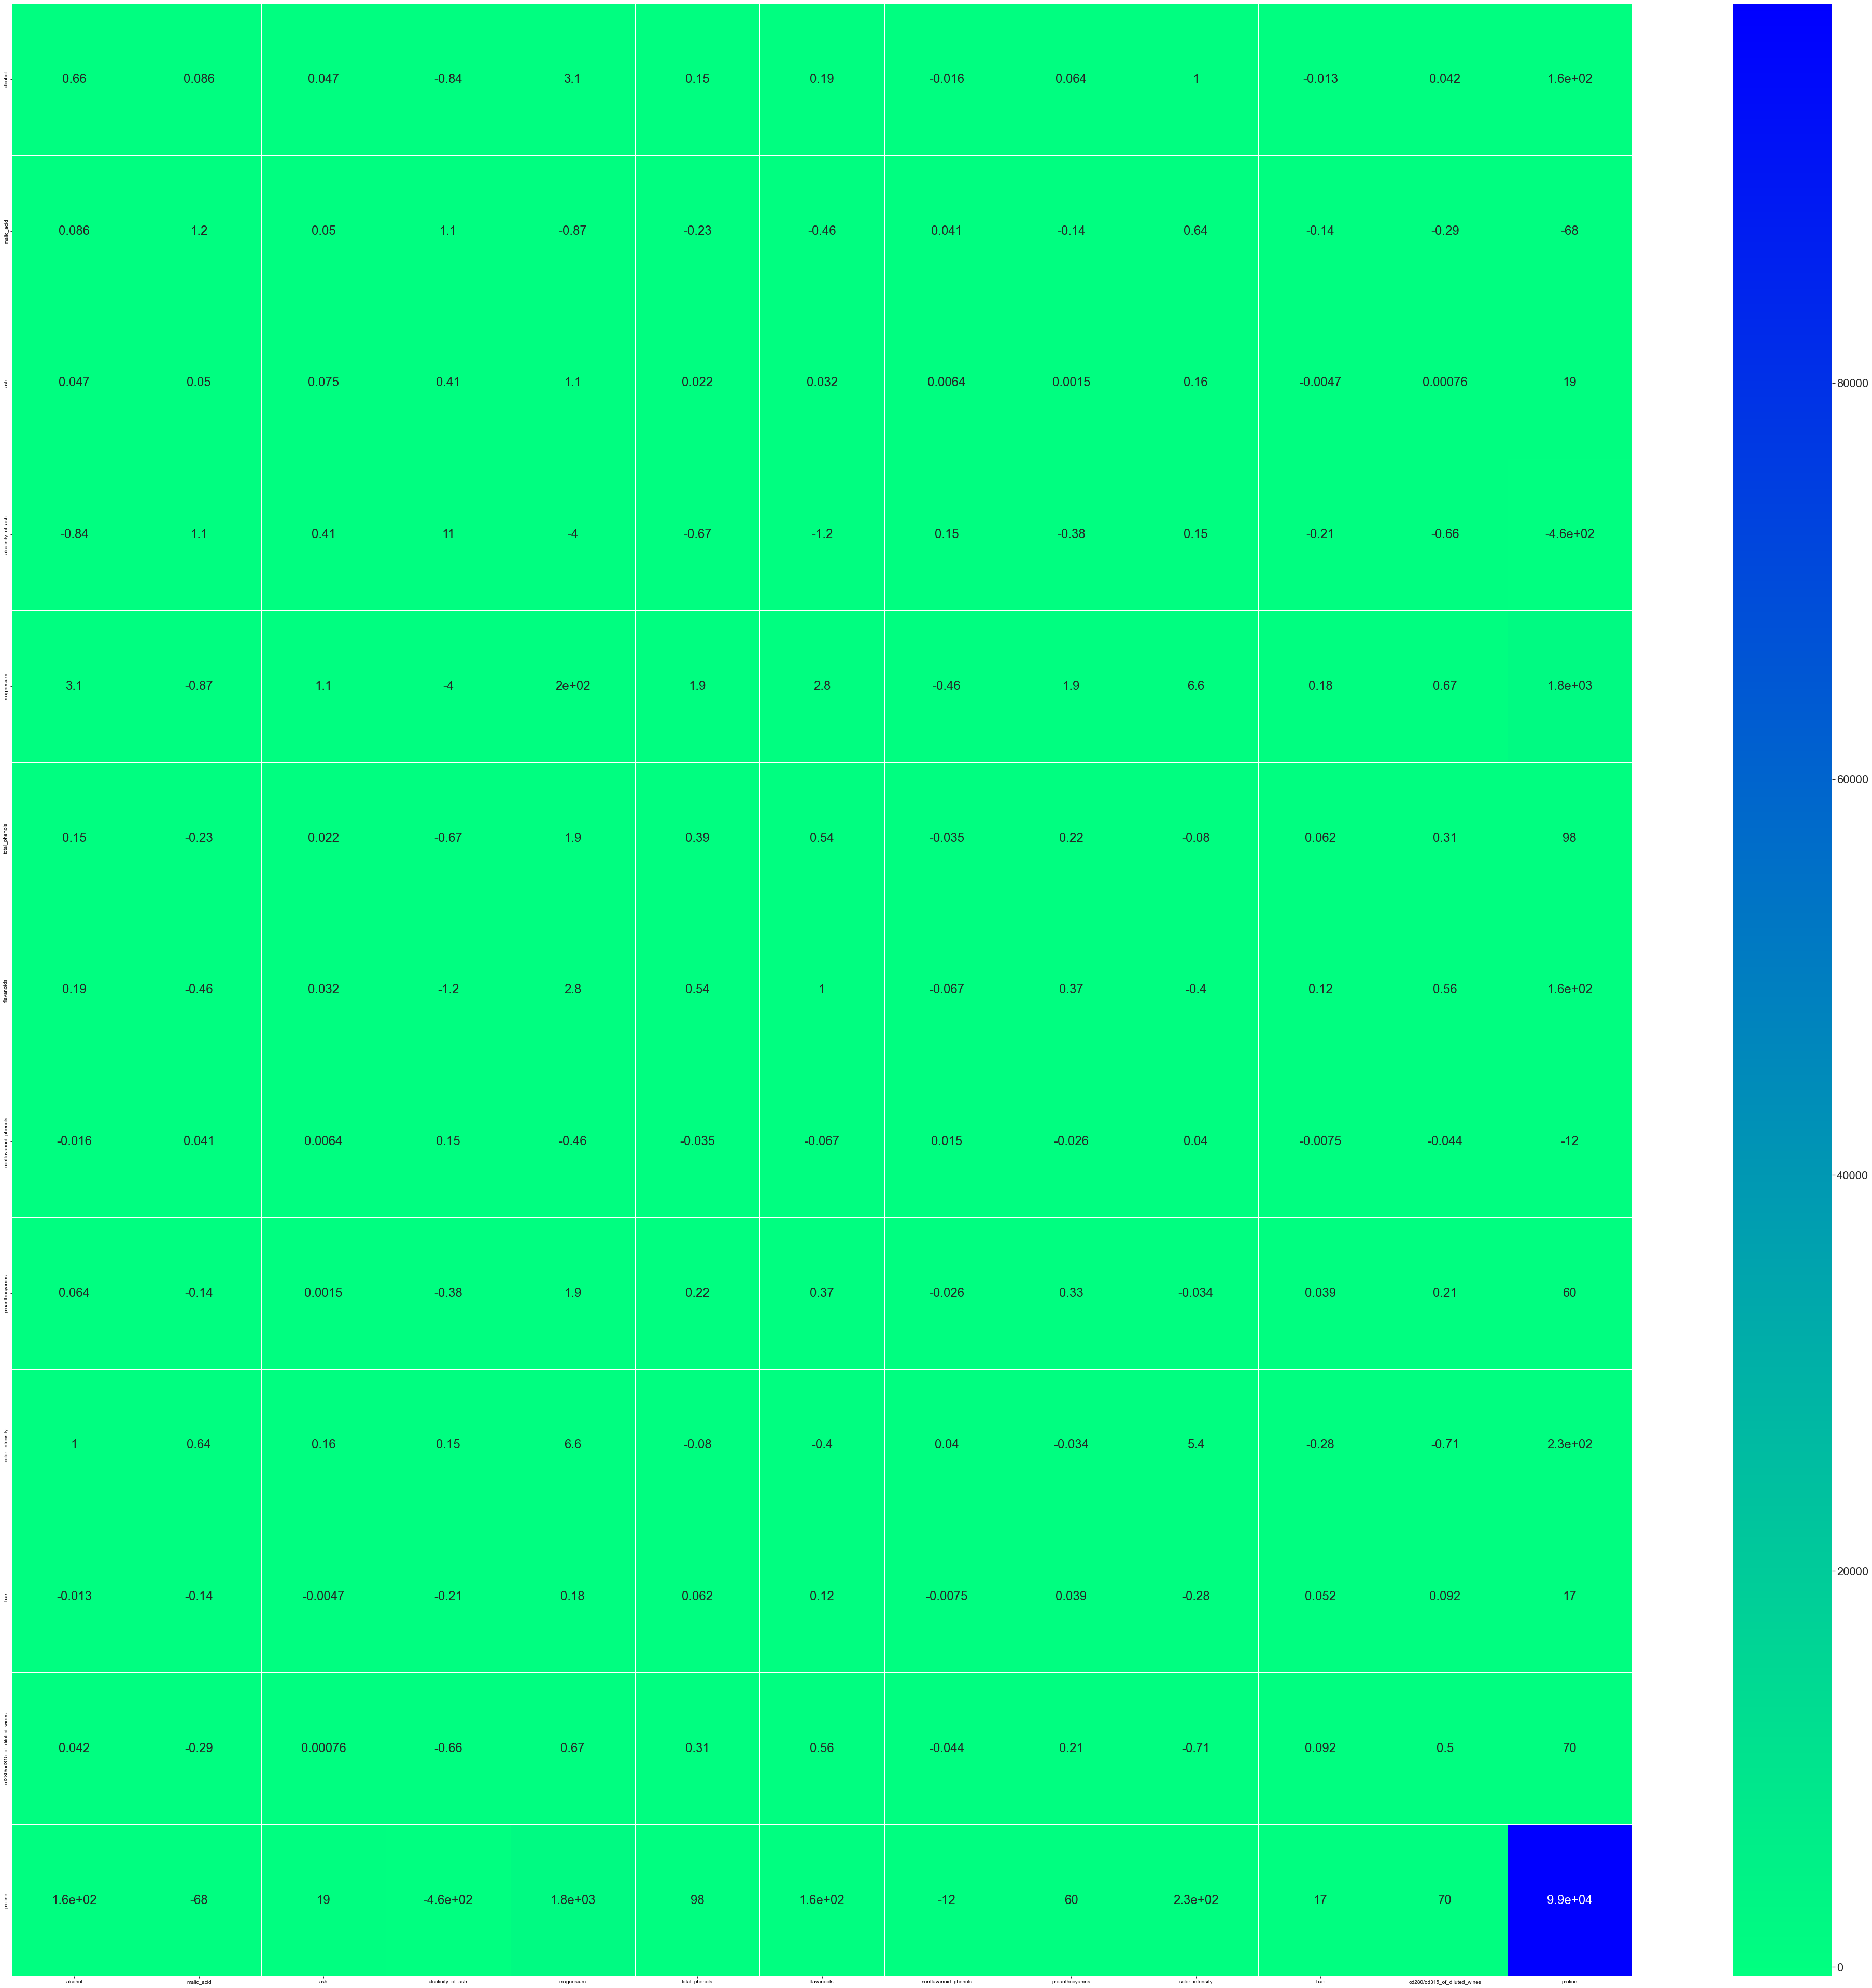

In [7]:

fig, ax = plt.subplots(figsize=(70,70)) 
sns.set(font_scale=2)
sns.heatmap(cov_matrix,cmap='winter_r', annot=True ,linewidths=.9,ax =ax ,fmt = ".2g") # _r to reverse the cmap

<AxesSubplot:>

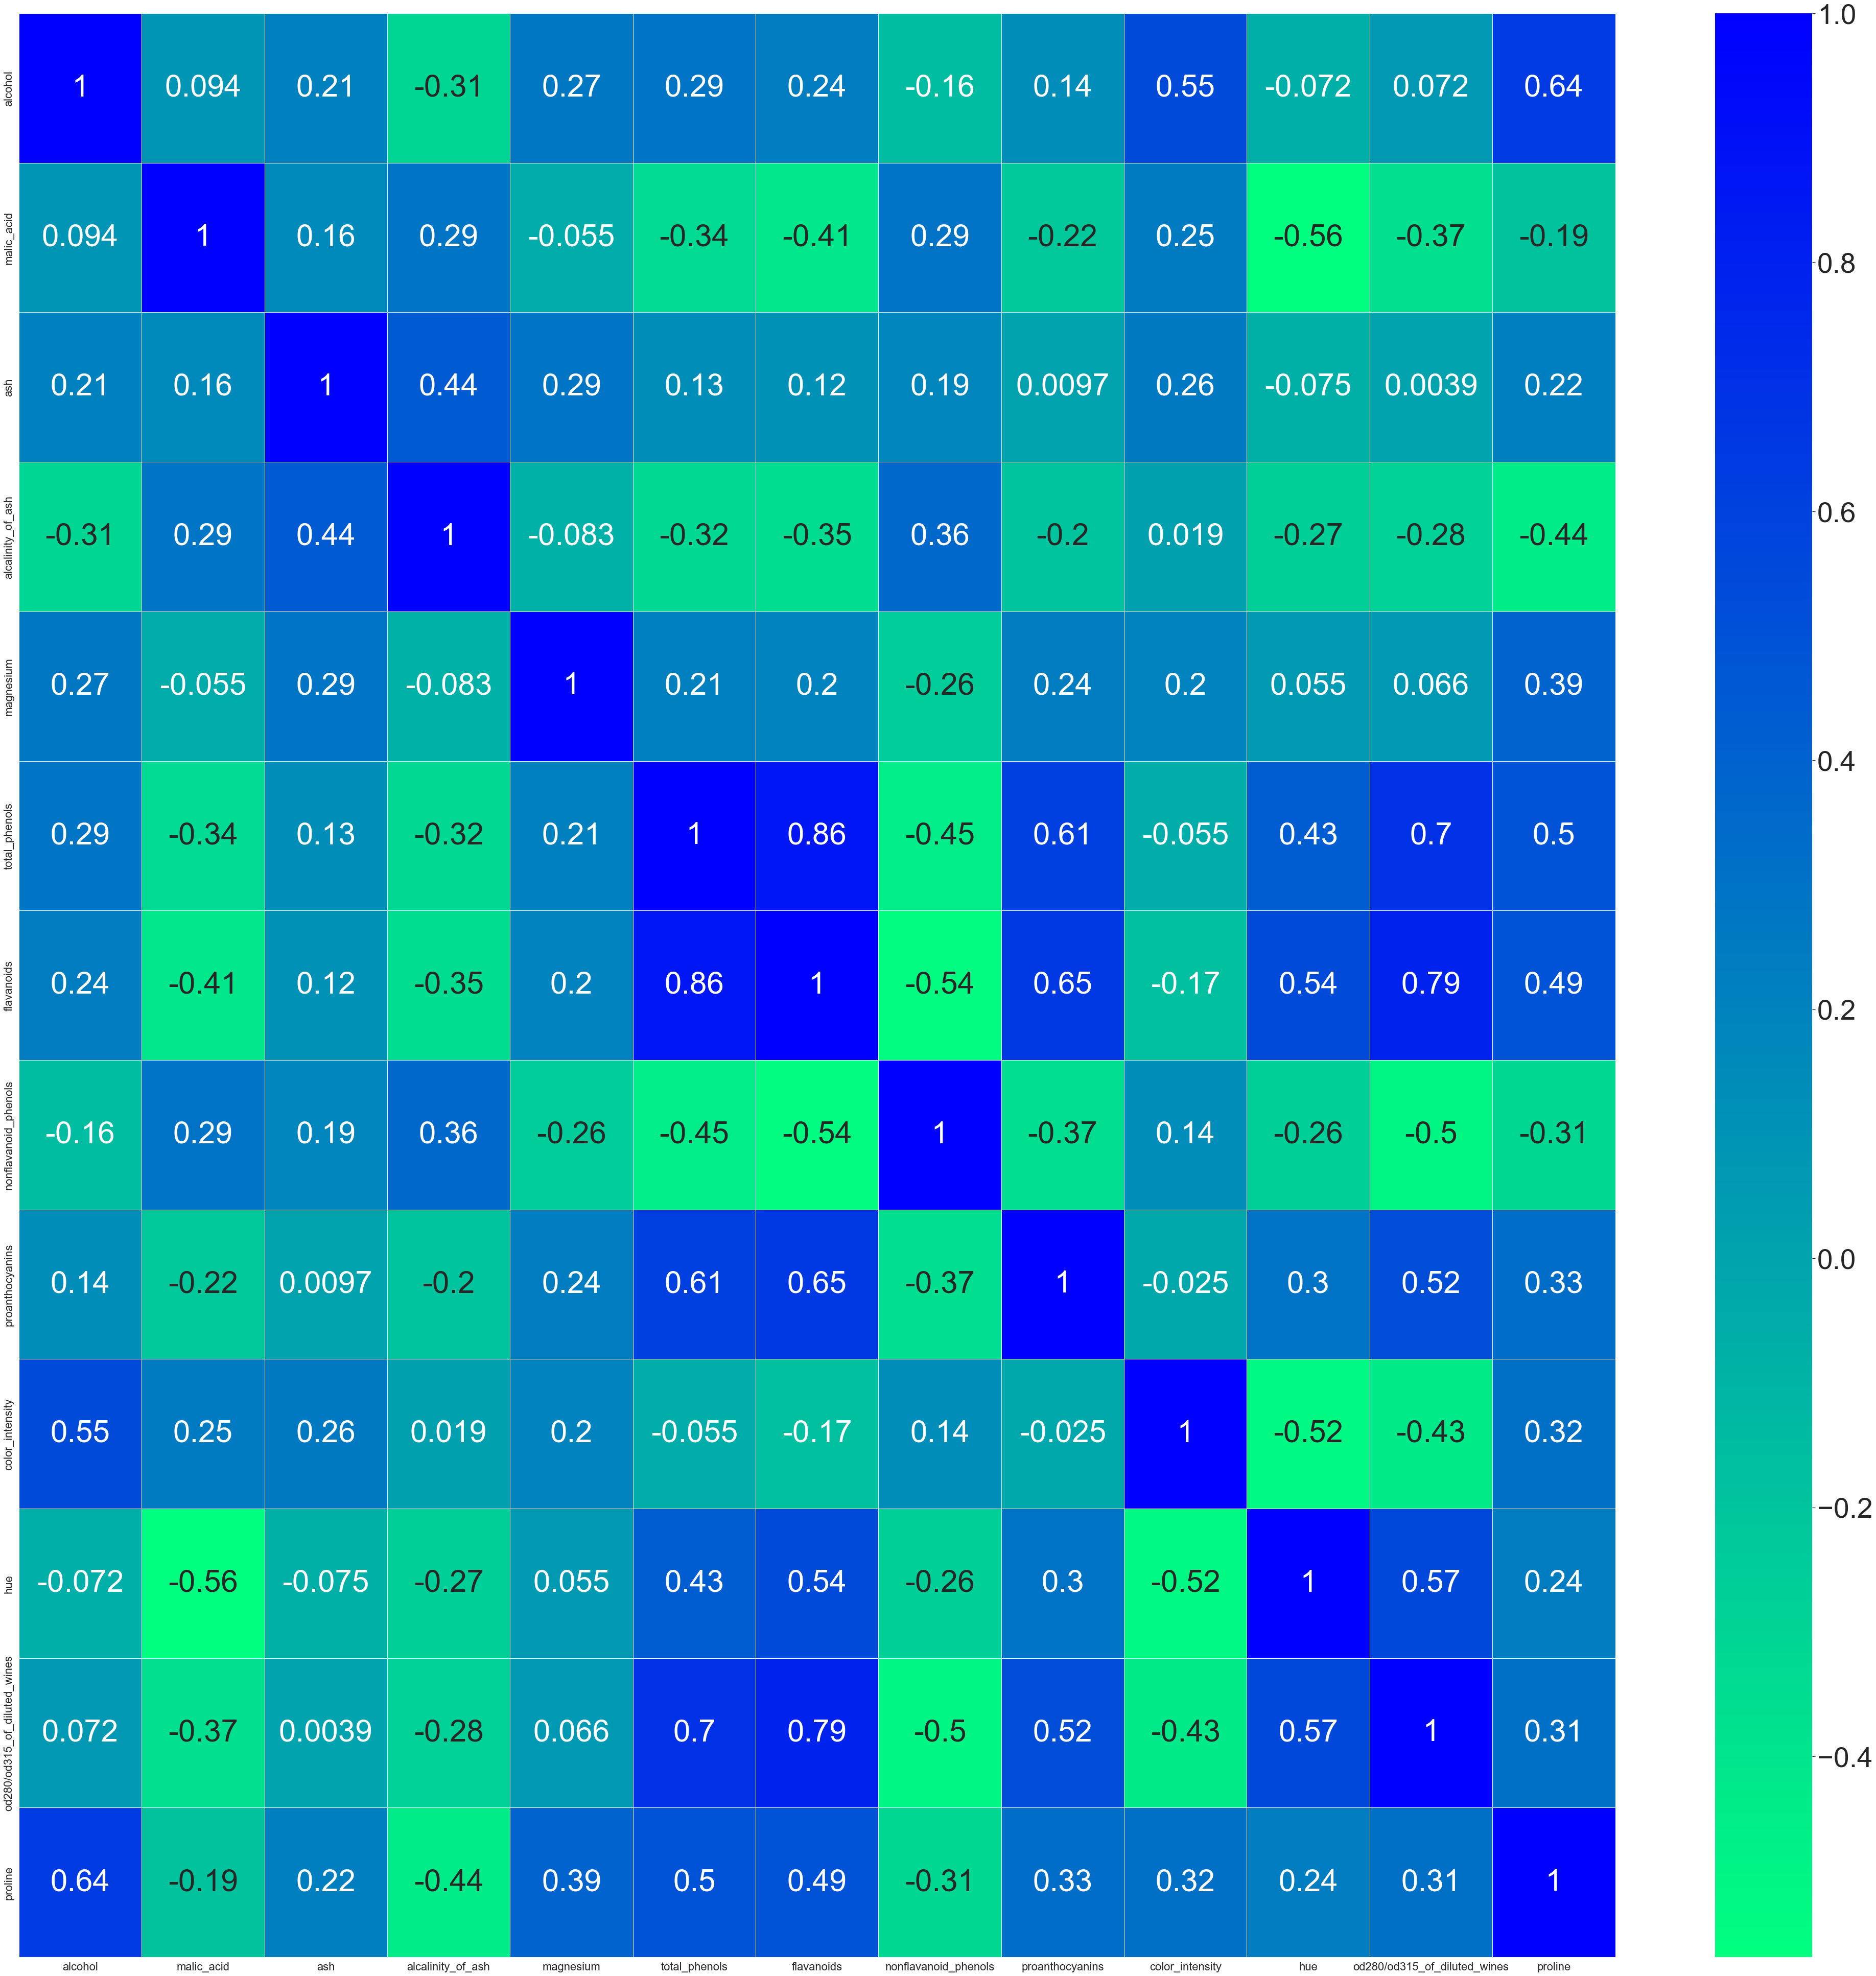

In [8]:
fig, ax = plt.subplots(figsize=(70,70)) 
sns.set(font_scale=5)
sns.heatmap(corr_matrix,cmap='winter_r', annot=True ,linewidths=1,ax =ax ,fmt = ".2g") # _r to reverse the cmap

In [9]:
# all values below 0.61 = 0 and all values above = One
a = corr_matrix.where(corr_matrix>0.61,0,inplace=True)
b = corr_matrix.where(corr_matrix<0.61,1,inplace=True)
correlation = corr_matrix.to_numpy()
print(correlation)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [10]:
strong_corr = []

for i in range(len(correlation)):
    
    strong_corr.append(correlation[i,:].sum()-1)
    
print(strong_corr)
print(feature_names)

[1.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 2.0, 0.0, 0.0, 2.0, 1.0]
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [11]:
strong_corr = np.array(strong_corr) 
index = np.argwhere(strong_corr == 0.0)

print(index)
      


[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 7]
 [ 9]
 [10]]


In [12]:
strong_corr = np.delete(strong_corr,index)
name_list = np.delete(feature_names,index)

Text(0, 0.5, 'num of Features correlated with feature x')

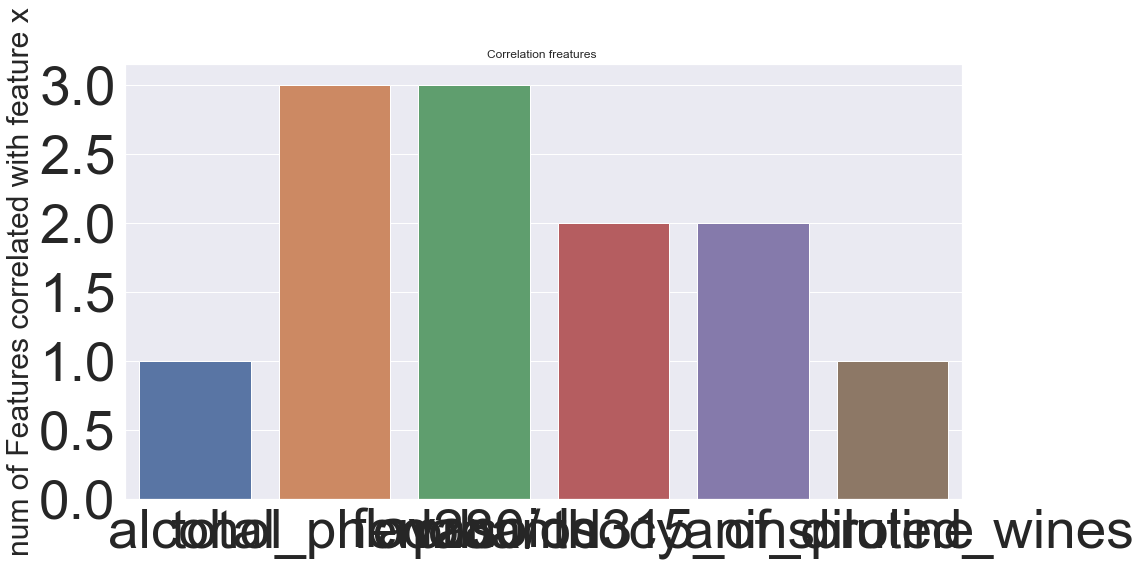

In [13]:
plt.figure(figsize=(15,8))

sns.barplot( x=name_list, y= strong_corr )
sns.set(font_scale=1)
plt.title("Correlation freatures ")
plt.ylabel("num of Features correlated with feature x",fontsize=30)

# Creating PCA object

In [14]:
np.random.seed(644)

scaler = StandardScaler()

data_scaled = scaler.fit_transform(df_features)

In [15]:
pca = PCA()

pca.fit(data_scaled)

PCA()

In [16]:
pca_data = pca.transform(data_scaled)

# scree plot analysis

In [17]:
per_var = np.round(pca.explained_variance_ratio_*100,decimals = 1)
labels = ["PC" + str(x) for x in range(1,len(per_var)+1)]

print(per_var[0:5])

[36.2 19.2 11.1  7.1  6.6]


Text(0, 0.5, 'Variance %')

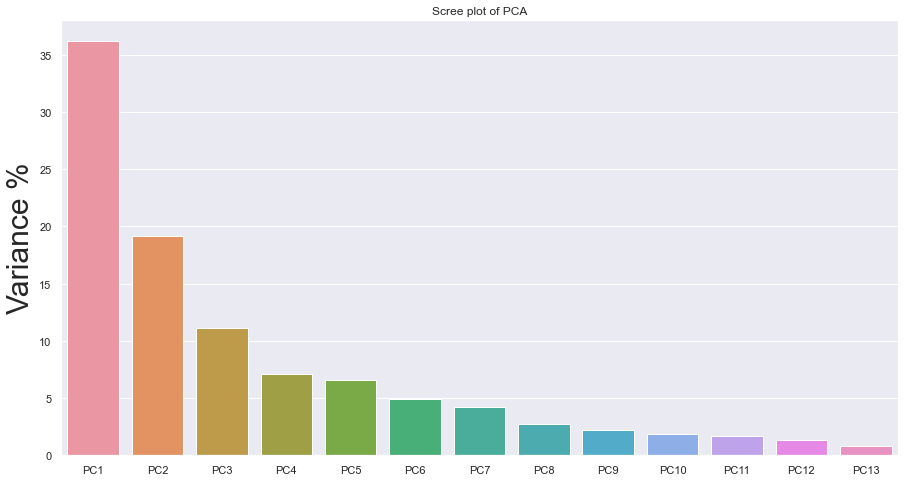

In [18]:
plt.figure(figsize=(15,8))

sns.barplot( x=labels, y= per_var )

plt.title("Scree plot of PCA")
plt.ylabel("Variance %",fontsize=30)

Seeing that seperation of data 

In [19]:
pca_df = pd.DataFrame(pca_data,columns = labels)

In [20]:
pca_df

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427   
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776   
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205   
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337   
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074   
..        ...       ...       ...       ...       ...       ...       ...   
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416   
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894   
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235   
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975   
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741   

          PC8       PC9      PC10      PC11      PC12      PC13  
0    0.065139  0.641443  1.020956 -0.451563  0.540810 -0.066239  
1    1.024416 -0.308847  0.159701 -0.142657  0.388238  0.003637  
2   -0.344216 -1.177834  0.113361 -0.286673  0.000584  0.021717  
3    0.643593  0.052544  0.239413  0.759584 -0.242020 -0.369484  
4    0.416700  0.326819 -0.078366 -0.525945 -0.216664 -0.079364  
..        ...       ...       ...       ...       ...       ...  
173 -0.146097 -0.022498 -0.304117  0.139228  0.170786 -0.114427  
174 -0.552427 -0.097969 -0.206061  0.258198 -0.279431 -0.187371  
175  0.047024  0.001222 -0.247997  0.512492  0.698766  0.072078  
176  0.390829  0.057448  0.491490  0.299822  0.339821 -0.021866  
177 -0.292914  0.741660 -0.117969 -0.229964 -0.188788 -0.323965  

[178 rows x 13 columns]

In [21]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.89) + 1
print(d)

print(sum(per_var[0:5]))

7
80.19999999999999


Need 8 PCA components to describe 90\% of the variance, This is almost all the features for describing the data as it is in the dataset. Using 5 80.2 \% will be considered. Both cases will be tested

In [36]:
print(labels[0:2])

['PC1', 'PC2']


In [37]:
pca_df_80 = pca_df.loc[:,labels[0:5]]
pca_df_90 = pca_df.loc[:,labels[0:7]]
pca_df_2 = pca_df.loc[:,labels[0:2]]

In [24]:
pca_df_90

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0    3.316751 -1.443463 -0.165739 -0.215631  0.693043 -0.223880  0.596427
1    2.209465  0.333393 -2.026457 -0.291358 -0.257655 -0.927120  0.053776
2    2.516740 -1.031151  0.982819  0.724902 -0.251033  0.549276  0.424205
3    3.757066 -2.756372 -0.176192  0.567983 -0.311842  0.114431 -0.383337
4    1.008908 -0.869831  2.026688 -0.409766  0.298458 -0.406520  0.444074
..        ...       ...       ...       ...       ...       ...       ...
173 -3.370524 -2.216289 -0.342570  1.058527 -0.574164 -1.108788  0.958416
174 -2.601956 -1.757229  0.207581  0.349496  0.255063 -0.026465  0.146894
175 -2.677839 -2.760899 -0.940942  0.312035  1.271355  0.273068  0.679235
176 -2.387017 -2.297347 -0.550696 -0.688285  0.813955  1.178783  0.633975
177 -3.208758 -2.768920  1.013914  0.596903 -0.895193  0.296092  0.005741

[178 rows x 7 columns]

In [38]:
pca_df_80.to_csv("Wine_PCA_5_features", encoding='utf-8', index=False)

pca_df_90.to_csv("Wine_PCA_7_features", encoding='utf-8', index=False)

pca_df_2.to_csv("Wine_PCA_2_features", encoding='utf-8', index=False)



# For plotting and illustrating selecting the 3 first PCA

In [26]:
df_pca_plot = pca_df.loc[:,labels[0:3]]

C:\Users\Lasse\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PC1 v PC2')

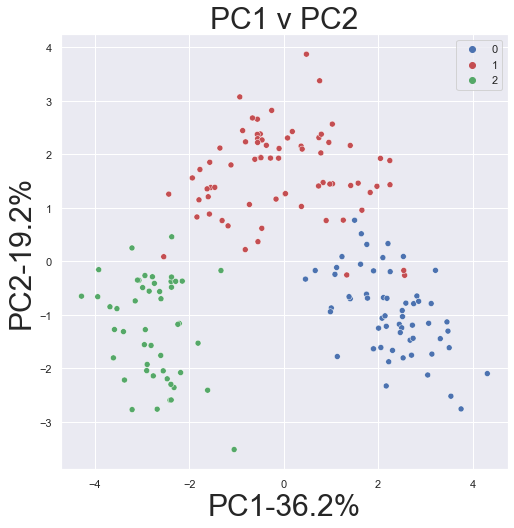

In [27]:
ax = plt.figure(figsize=(8,8))
sns.scatterplot(df_pca_plot.PC1, df_pca_plot.PC2,hue=z, palette =["b","r","g"])
plt.xlabel("PC1-{0}%".format(per_var[0]),fontsize=30)
plt.ylabel("PC2-{0}%".format(per_var[1]),fontsize=30)
plt.title("PC1 v PC2",fontsize=30)

C:\Users\Lasse\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PC1 v PC3')

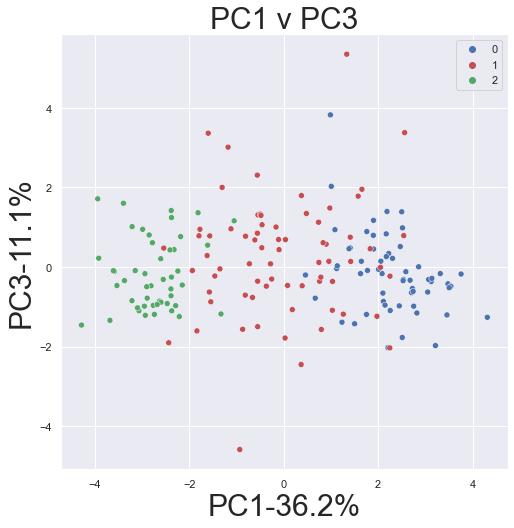

In [28]:
ax = plt.figure(figsize=(8,8))
sns.scatterplot(df_pca_plot.PC1, df_pca_plot.PC3,hue=z, palette =["b","r","g"])
plt.xlabel("PC1-{0}%".format(per_var[0]),fontsize=30)
plt.ylabel("PC3-{0}%".format(per_var[2]),fontsize=30)
plt.title("PC1 v PC3",fontsize=30)

C:\Users\Lasse\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'PC2 v PC3')

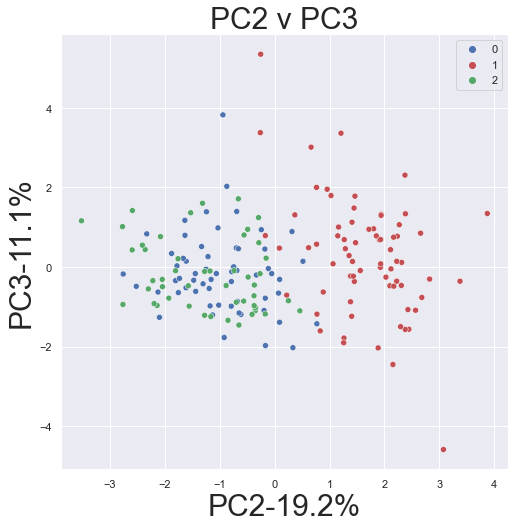

In [29]:
ax = plt.figure(figsize=(8,8))
sns.scatterplot(df_pca_plot.PC2, df_pca_plot.PC3,hue=z, palette =["b","r","g"])
plt.xlabel("PC2-{0}%".format(per_var[1]),fontsize=30)
plt.ylabel("PC3-{0}%".format(per_var[2]),fontsize=30)
plt.title("PC2 v PC3",fontsize=30)

In [30]:
import plotly.express as px
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3',
              color= z)
fig.show()

In [31]:
loading_scores_1  = pd.Series(pca.components_[0],index=feature_names)
loading_scores_2  = pd.Series(pca.components_[1],index=feature_names)

In [32]:
sort_loading_scores_1 = loading_scores_1.abs().sort_values(ascending=False)
ten_features_1 = sort_loading_scores_1[0:10].index.values


sort_loading_scores_2 = loading_scores_2.abs().sort_values(ascending=False)
ten_features_2 = sort_loading_scores_2[0:10].index.values

df_load = pd.DataFrame(loading_scores_1[ten_features_1])
df_load.to_latex()



print(df_load)

print(loading_scores_2[ten_features_2])

                                     0
flavanoids                    0.422934
total_phenols                 0.394661
od280/od315_of_diluted_wines  0.376167
proanthocyanins               0.313429
nonflavanoid_phenols         -0.298533
hue                           0.296715
proline                       0.286752
malic_acid                   -0.245188
alcalinity_of_ash            -0.239320
alcohol                       0.144329
color_intensity                -0.529996
alcohol                        -0.483652
proline                        -0.364903
ash                            -0.316069
magnesium                      -0.299634
hue                             0.279235
malic_acid                     -0.224931
od280/od315_of_diluted_wines    0.164496
total_phenols                  -0.065040
proanthocyanins                -0.039302
dtype: float64


In [33]:
df_comp = pd.DataFrame(pca.components_[0:3],columns=feature_names,index = ["PC1","PC2","PC3"])

<AxesSubplot:>

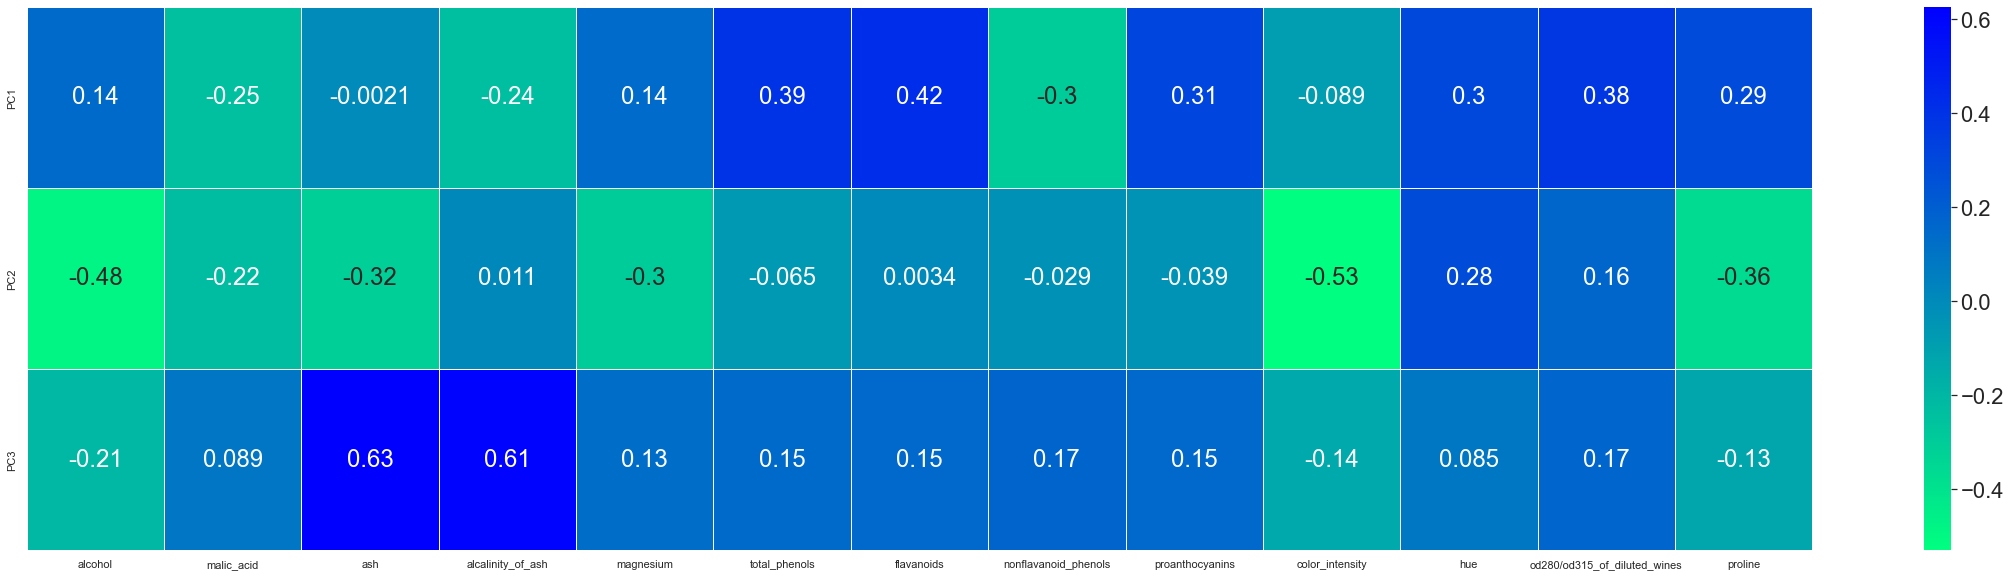

In [34]:
fig, ax = plt.subplots(figsize=(40,10)) 
sns.set(font_scale=2)
sns.heatmap(df_comp,cmap='winter_r', annot=True ,linewidths=.9,ax =ax ,fmt = ".2g") # _r to reverse the cmap